Joe's notebook for rainfall kaggle competition

In [ ]:
# https://www.kaggle.com/code/sulaniishara/rain-or-shine-rainfall-prediction-with-ml#Relationships-Between-Pressure,-Wind-Direction,-Wind-Speed,-and-Rainfall


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Visualize data
All the data is numeric so we don't need to categorize it at all.

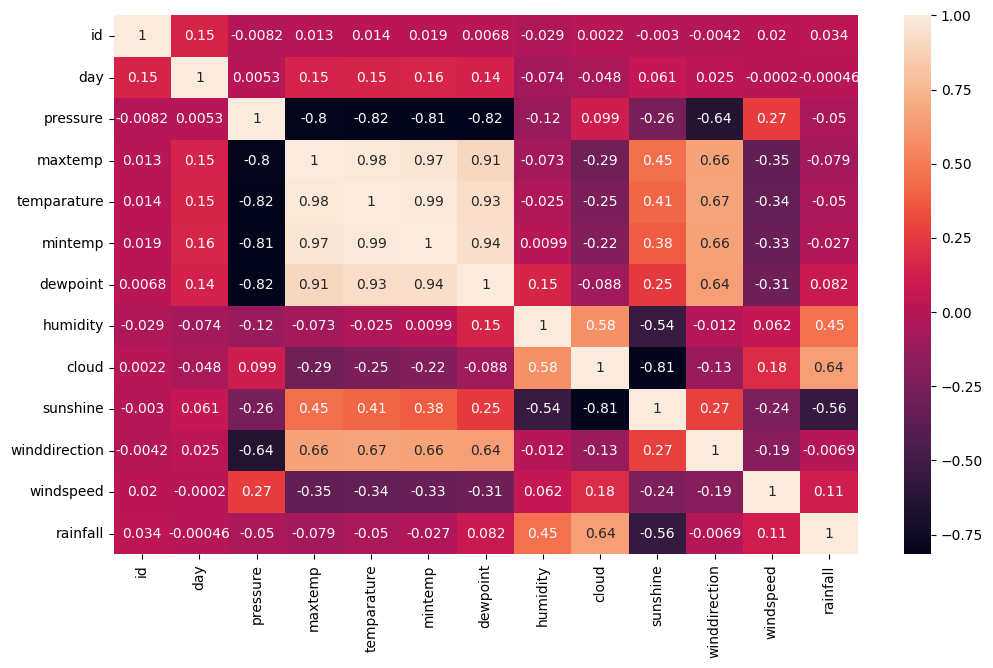

In [ ]:
# plt.figure(figsize=(12,7))
# #why do we use .corr? what does it do
# sns.heatmap(train.corr(),annot=True)

# # winds = train['winddirection'].values
# # plt.hist((winds))


# plt.show()




In [ ]:
#try massaging the data a bit
newtrain = train.drop(columns='winddirection')

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,22.1,1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,35.3,1
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,32.9,1
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,18.0,1


### Predict Data

In [32]:
#imports for prediction
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC

In [ ]:
x = train.drop(columns=['rainfall','winddirection','day']) 
y = train["rainfall"] 

#split data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [46]:
#KNN
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print("KNN Accuracy:{:.2f}%".format(knn.score(x_test,y_test)*100))

KNN Accuracy:82.19%


In [47]:
#SVM
svm=SVC()
svm.fit(x_train,y_train)
print("SVM Accuracy:{:.2f}%".format(svm.score(x_test,y_test)*100))

SVM Accuracy:72.15%


In [48]:
#XGB
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
print("XGB Accuracy:{:.2f}%".format(xgb.score(x_test,y_test)*100))

XGB Accuracy:82.65%
